In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from numpy.lib import scimath
%matplotlib inline

C:\Miniconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [10]:
def generate_states(N,s):
    """generate quasi probability distribution from Chapman paper"""
    sx = np.random.normal(loc = 0, scale = 1/np.sqrt(N), size = s)
    sy = np.random.normal(loc = 0, scale = 1/np.sqrt(N), size =s)
    nyz = np.random.normal(loc = 0, scale = 1/np.sqrt(N), size = s)
    nxz = np.random.normal(loc = 0, scale = 1/np.sqrt(N), size = s)

    txip = np.arctan(-(sy + nyz)/(sx+ nxz))
    txim = np.arctan((sy-nyz)/(sx-nxz))
    a = (sx+nxz)**2/(np.cos(txip))**2
    b = (sx-nxz)**2/(np.cos(txim))**2

    rho_0 = 1/2 + scimath.sqrt(1/4-(a+b)/8)
    m = 1/rho_0*(a-b)/8

    states = np.zeros((len(m),3),dtype = complex)

    states[:,0] = scimath.sqrt((1-rho_0+m)/2) * np.exp(txip*1j)
    states[:,1] = scimath.sqrt(rho_0)
    states[:,2] = scimath.sqrt((1-rho_0-m)/2) * np.exp(txim*1j)

    return states

In [68]:
N = 10000
data = generate_states(N,400000)
def msqr(x):
    return np.conj(x) * x

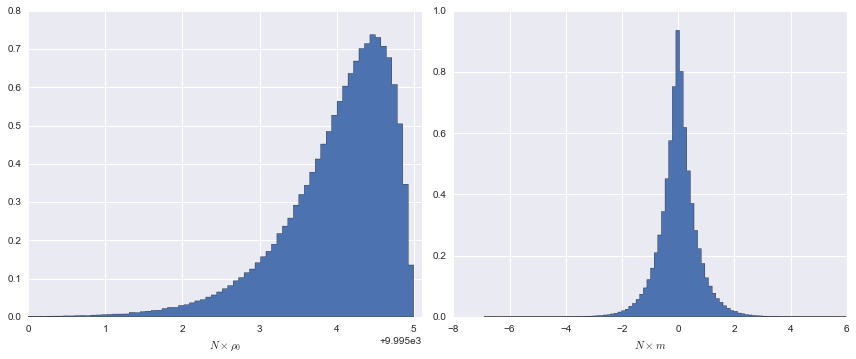

In [74]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
rho_0 =N*msqr(data[:,1]).real
m = N*(msqr(data[:,2])-msqr(data[:,0])).real
ax[0].hist(rho_0,bins=100,normed=True,histtype='stepfilled');
ax[1].hist(m,bins=100,normed=True,histtype='stepfilled');
ax[0].set_xlim([N-5,N+.1])
plt.tight_layout()
ax[0].set_xlabel(r'$N\times \rho_0$')
ax[1].set_xlabel(r'$N\times m$')
plt.savefig('InitialDistribution.pdf')

In [12]:
f_data = np.loadtxt('Fock_Fock_results.txt',skiprows=1)
m_data = np.loadtxt('Mean_TW_results.txt',skiprows=1)
c_data = np.loadtxt('Coherent_Cheby_results.txt',skiprows=1)
data = {'fock':[f_data,'red'],'TW':[m_data,'green'],'Coherent':[c_data,'blue']}

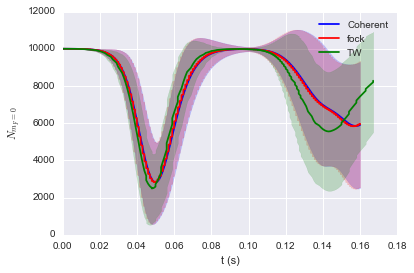

In [14]:
for key in data.keys():
    time = data[key][0][:,0]
    mean = data[key][0][:,1]
    std = data[key][0][:,2]
    col = data[key][1]
    plt.fill_between(time,mean-std,mean+std,alpha=.2,color=col)
    plt.plot(time,mean,label=key,color=col)
plt.legend()
plt.xlabel('t (s)')
plt.ylabel(r'$N_{m_F=0}$')
plt.savefig('output.pdf')